In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,cross_val_score

In [2]:
data=pd.read_csv("D:\Excel R\Assignments\Assignment 15\Fraud_check.csv")

In [3]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


<AxesSubplot:xlabel='Work.Experience'>

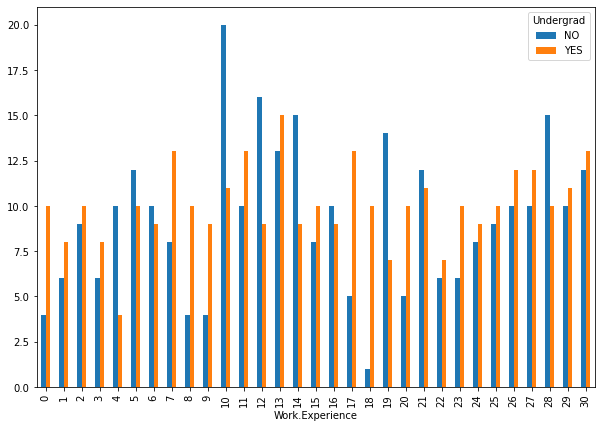

In [6]:
pd.crosstab(data['Work.Experience'],data['Undergrad']).plot(kind='bar',figsize=(10,7))

In [8]:
rvn=pd.cut(data['Taxable.Income'],bins=[0,30000,100000],labels=['Risky','Good'])
rvn

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [10]:
data['Status']=rvn
d1=data.drop(['Taxable.Income'],axis=1)
d1

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Status
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [16]:
obj=['Undergrad','Marital.Status','Urban']
d1[obj]=d1[obj].astype('category')

In [17]:
obj1=['Undergrad','Marital.Status','Urban','Status']
d1[obj1]=d1[obj1].apply(LabelEncoder().fit_transform)

In [21]:
d1.iloc[:,2:3]=StandardScaler().fit_transform(d1.iloc[:,2:3])
d1

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Status
0,0,2,-1.178521,10,1,0
1,1,0,0.508500,18,1,0
2,0,1,1.033109,30,1,0
3,1,2,1.696831,15,1,0
4,0,1,-1.630532,28,0,0
...,...,...,...,...,...,...
595,1,0,-1.390432,7,1,0
596,1,0,-1.071672,2,1,0
597,0,0,0.909696,0,1,0
598,1,1,1.432197,17,0,0


In [22]:
x=d1.iloc[:,0:5]
y=d1.iloc[:,5]

In [23]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,-1.178521,10,1
1,1,0,0.508500,18,1
2,0,1,1.033109,30,1
3,1,2,1.696831,15,1
4,0,1,-1.630532,28,0
...,...,...,...,...,...
595,1,0,-1.390432,7,1
596,1,0,-1.071672,2,1
597,0,0,0.909696,0,1
598,1,1,1.432197,17,0


In [24]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Status, Length: 600, dtype: int64

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [27]:
res=[]
for i in range(100,150):
    rf=RandomForestClassifier(n_estimators=i,max_features=3,oob_score=True)
    rf.fit(x_train,y_train)
    train_acc=np.mean(y_train==rf.predict(x_train))
    test_acc= np.mean(y_test==rf.predict(x_test))
    oob_score=rf.oob_score_
    res.append([oob_score,train_acc,test_acc])

In [28]:
Results=pd.DataFrame(res,columns=['Oob Score','Train Accuracy','Test Accuracy'])
Results['no_estimators']=np.arange(100,150)
Results

,Oob Score,Train Accuracy,Test Accuracy,no_estimators
0,0.754167,1.0,0.750000,100
1,0.750000,1.0,0.741667,101
2,0.737500,1.0,0.750000,102
3,0.745833,1.0,0.733333,103
4,0.733333,1.0,0.750000,104
5,0.739583,1.0,0.750000,105
6,0.739583,1.0,0.750000,106
7,0.737500,1.0,0.741667,107
8,0.739583,1.0,0.750000,108
9,0.733333,1.0,0.741667,109


In [29]:
Results.sort_values(by='Test Accuracy',ascending=False)

,Oob Score,Train Accuracy,Test Accuracy,no_estimators
47,0.739583,1.0,0.766667,147
30,0.741667,1.0,0.766667,130
31,0.737500,1.0,0.766667,131
13,0.735417,1.0,0.758333,113
24,0.733333,1.0,0.758333,124
19,0.745833,1.0,0.758333,119
42,0.733333,1.0,0.758333,142
40,0.737500,1.0,0.758333,140
14,0.739583,1.0,0.750000,114
21,0.756250,1.0,0.750000,121


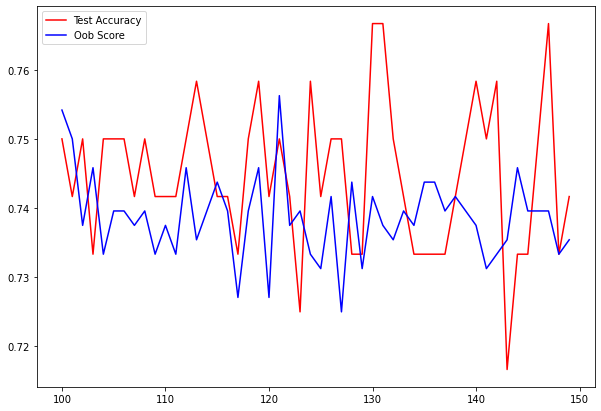

In [31]:
plt.figure(figsize=(10,7))
plt.plot(Results['no_estimators'],Results['Test Accuracy'],color='red',label='Test Accuracy')
plt.plot(Results['no_estimators'],Results['Oob Score'],color='blue',label='Oob Score')
plt.legend()
plt.show()

## Building Random Forest:-

In [32]:
kfold=KFold(n_splits=15)
model_rfc=RandomForestClassifier(n_estimators=147,max_features=3)

### 1. Cross Validation:-

In [33]:
cv_result=cross_val_score(model_rfc,x,y,cv=kfold)
p_result=(cv_result.mean())*100
print('Accuracy of the model using the cross validation is:-',p_result,'%')

Accuracy of the model using the cross validation is:- 74.5 %


### 2. Calssifacation Report:-

In [34]:
fit=model_rfc.fit(x_train,y_train)
fit

RandomForestClassifier(max_features=3, n_estimators=147)

In [35]:
prediction=fit.predict(x_test)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [36]:
pd.crosstab(y_test,prediction)

col_0,0,1
Status,,
0,88,7
1,24,1


## Accuracy:-

In [37]:
acc=np.mean(prediction==y_test)
accuracy=acc*100
print('Accuracy:-',accuracy,'%')

Accuracy:- 74.16666666666667 %


In [38]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.93      0.79      0.85       112
           1       0.04      0.12      0.06         8

    accuracy                           0.74       120
   macro avg       0.48      0.46      0.46       120
weighted avg       0.87      0.74      0.80       120

